Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

Import Data + Data Wrangling

In [2]:
data = pd.read_csv("Umfragedaten_v1_an.csv")
data["RAUCH"] = data["RAUCH"].map({"NEIN": 0, "JA": 1})
data = data[data["NETTO"].notna()]
data = data[data["RAUCH"].notna()]

Setting up data for regression

In [3]:
x_fit = data["NETTO"].values.reshape(-1, 1)
y_fit = data["RAUCH"].values

Plot our data

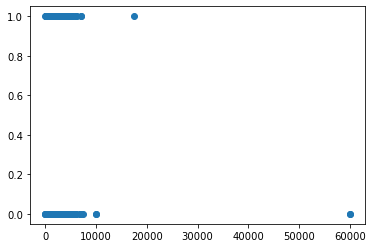

In [4]:
plt.scatter(x_fit, y_fit)

Create model and predict some values

In [5]:
model = LogisticRegression().fit(x_fit, y_fit)
x_predict = [[i] for i in range(60000)]
y_predict = model.predict_proba(x_predict)
y_predict = [[i[1]] for i in y_predict]

Plot our model with data

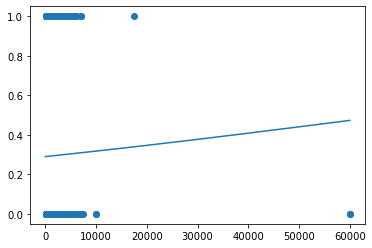

In [6]:
plt.scatter(x_fit, y_fit)
plt.plot(x_predict, y_predict)

Logarithmize x scale for better readability

In [7]:
x_fit_log = np.log(x_fit)

Create model and predict some values

In [8]:
model_log = LogisticRegression().fit(x_fit_log, y_fit)
x_predict_log = [[i] for i in range(-15, 35)]
y_predict_log = model_log.predict_proba(x_predict_log)
y_predict_log = [[i[1]] for i in y_predict_log]

Plot our new model with data

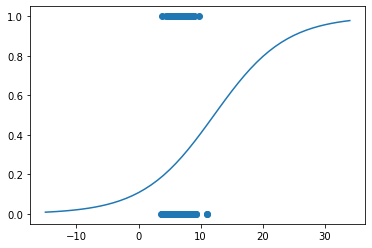

In [9]:
plt.scatter(x_fit_log, y_fit)
plt.plot(x_predict_log, y_predict_log)

Predict smoking status of person with income of 2000

In [10]:
income = 2000
print(model.predict_proba([[income]])[0][1] * 100, "%")

29.54420066090507 %
